# Figure 1(i): Hysteresis Plots
This notebook reproduces the three hysteresis plots in figure 1(i) which appear in the paper. The show $\left< m_z\right>$ vs. $H$, where $\left< m_z\right>$ is the spatially averaged out-of-plane ($z$) component of the magnetisation and $H$ is the strength of the external field, which was applied in the $z$ direction.

The range of field values where the different states occured throughout the hysteresis (for increasing field values only) are indicated by coloured regions on the graphs.

Finally, the values for  $\frac{\mathrm{d}\left< m_z \right>}{\mathrm{d} H}$ are also plotted on the graphs.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We start by defining a few helper variables and functions which be used for creating the plots below.

In [2]:
# define colours used in plots
dark_purple = '#8464c5'
light_purple = '#ededfb'
dark_green = '#336433'
light_green = '#a0d9a0'
white = '#FFFFFF'
olive = '#aaa460'

In [3]:
def get_data(t):
    """
    Loads the hysteresis data for a specified thickness, t, from the relevant file
    and calculates the values of dm_z/dH.
    Creates arrays for the values of H (*Ms)
    
    Returns mz, dm_z/dH (scaled values) and the values for H
    (mz, dmdH_scaled, H_all)
    """
    # load hysteresis data for specified thickness
    mx, my, mz, energy = np.load('../data/figure_1/hysteresis_loops/'
                                 'sim_hysteresis_FeGe_nanodisk_d150_h{}.npy'.format(int(t)))

    # create arrays for the Zeeman field
    H_up = np.linspace(-4, 4, 400, endpoint=False)
    H_down = np.linspace(4, -4, 401)
    H_all = np.concatenate((H_up, H_down), axis=0)

    # calculate dm/dH from the data. dm/dH is scaled to a maximum value of 1.
    dm = mz[1:-1] - mz[0:-2]
    dH = H_all[1:-1] - H_all[0:-2]
    dmdH = dm/dH
    dmdH_scaled = dmdH/max(dmdH)
    
    return mz, dmdH_scaled, H_all

In [4]:
def base_plot(mz, dmdH_scaled, H_all):
    """
    Function to plot the mz vs. H hysteresis curves.
    Adds colour shading to the different regions occuring throughout the hysteresis.
    
    Requires the values of mz, dmdH_scaled and H, the array of field steps on the hysteresis loop.
    
    The plot is returned
    """
    # get relevant data for the specified thickness
    mz, dmdH_scaled, H_all = get_data(t)
    
    # create the figure and define an axis paramerter.
    fig = plt.figure(figsize=(9, 5))
    ax = fig.add_subplot(111)

    # plot mz vs. H values.
    ax.plot(H_all[0:400], mz[0:400], 'k', linewidth=2.5, label="Increasing H")
    ax.plot(H_all[400:801], mz[400:801], '--', color='k', linewidth=2.5, label="Decreasing H")

    # plot the dm_z/dH vs. H values 
    ax.plot(H_all[0:400], dmdH_scaled[0:400], 'b--', markevery=3, linewidth=1.5, label=r'dm$_z$/dH')
    
    # add axis labels
    plt.ylabel(r'm$_{\mathrm{z}}$', fontsize=20)
    plt.xlabel(r'H ($\times$M$_{\mathrm{s}}$)', fontsize=20)
    plt.xticks([-4, -3 ,-2, -1, 0, 1, 2, 3, 4], fontsize=18)
    plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=18)
    plt.xlim([-3, 3])

    # add the legend
    plt.legend(loc='lower right', fontsize=16)

    plt.tight_layout()
    return plt, ax

The plots are produced below.

Note that 'trans' is a list of index values associated with the H array which define the field step number when the transitions into different states occurred during the hysteresis. There were 801 steps in the hysteresis loop in total.

So in the first plot, for thickness, $t=20$nm, the transitions into a different state occurred at 219th step in the hysteresis loop and the 319th. The value of the external field at these step points were $H=0.38\times$M$_s$ and $H=2.38\times$M$_s$ repectively. 

These transition values correspond to values of H=0.38*Ms and H=2.38*Ms
where Ms=384 kA/m


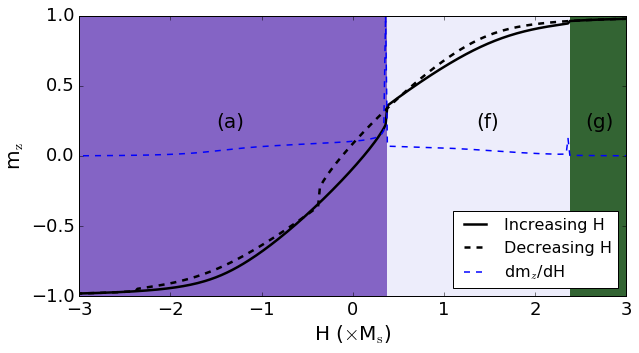

In [5]:
# define the thickness
t = 20

# get data
mz, dmdH_scaled, H_all = get_data(t)
plt, ax = base_plot(mz, dmdH_scaled, H_all)

trans = [219, 319]
print 'These transition values correspond to values of H={219}*Ms and H={319}*Ms\n'\
      'where Ms=384 kA/m'.format(*H_all)

# add letter labels, which refer to 3D magnetisation plots
ax.text(-1.5, 0.2, '(a)', fontsize=20)
ax.text(1.35, 0.2, '(f)', fontsize=20)
ax.text(2.55, 0.2, '(g)', fontsize=20)

# Colour the different regions in the hysteresis plot
ax.axvspan(H_all[0], H_all[trans[0]], color=dark_purple)
ax.axvspan(H_all[trans[0]], H_all[trans[1]], color=light_purple)
ax.axvspan(H_all[trans[1]], 3, color=dark_green)

plt.savefig('pdfs/figure-1i-20nm.pdf')

plt.show()

These transition values correspond to values of H=0.14*Ms, H=0.4*Ms and H=2.2*Ms
where Ms=384 kA/m


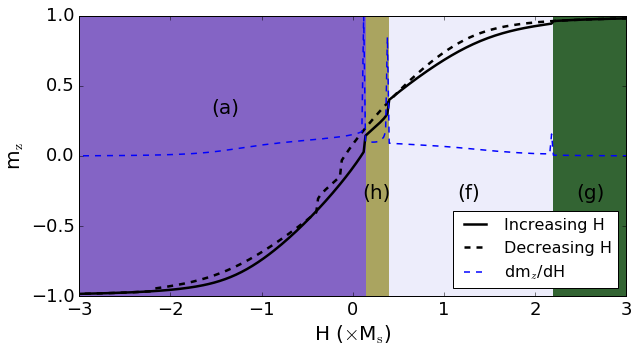

In [6]:
t = 35

mz, dmdH_scaled, H_all = get_data(t)
plt, ax = base_plot(mz, dmdH_scaled, H_all)

trans = [207, 220, 310]
print 'These transition values correspond to values of H={207}*Ms, H={220}*Ms and H={310}*Ms\n'\
      'where Ms=384 kA/m'.format(*H_all)

# add letter labels, which refer to 3D magnetisation plots
ax.text(-1.55, 0.3, '(a)', fontsize=20)
ax.text(0.1, -0.3, '(h)', fontsize=20)
ax.text(1.15, -0.3, '(f)', fontsize=20)
ax.text(2.45, -0.3, '(g)', fontsize=20)

# Colour the different regions in the hysteresis plot
ax.axvspan(H_all[0], H_all[trans[0]], color=dark_purple)
ax.axvspan(H_all[trans[0]], H_all[trans[1]], color=olive)
ax.axvspan(H_all[trans[1]], H_all[trans[2]], color=light_purple)
ax.axvspan(H_all[trans[2]], 3, color=dark_green)

plt.savefig('pdfs/figure-1i-35nm.pdf')

plt.show()

These transition values correspond to values of H=-0.94*Ms, H=-0.48*Ms, H=0.2*Ms, H=0.28*Ms, H=0.5*Ms and H=2.08*Ms
where Ms=384 kA/m


/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:2158: UserWarning: 'frac' option in 'arrowstyle' is no longer supported; use 'headlength' to set the head length in points.
  "'frac' option in 'arrowstyle' is no longer supported;"


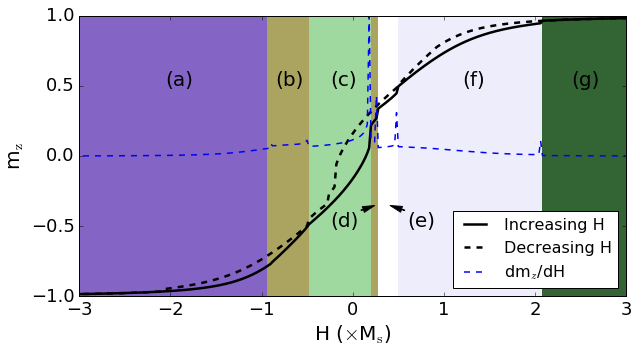

In [7]:
t = 55

mz, dmdH_scaled, H_all = get_data(t)
plt, ax = base_plot(mz, dmdH_scaled, H_all)

trans = [153, 176, 210, 214, 225, 304]
print 'These transition values correspond to values of H={153}*Ms, H={176}*Ms, '\
      'H={210}*Ms, H={214}*Ms, H={225}*Ms and H={304}*Ms\n'\
      'where Ms=384 kA/m'.format(*H_all)

# add letter labels, which refer to 3D magnetisation plots
ax.text(-2.05, 0.5, '(a)', fontsize=20)
ax.text(-0.85, 0.5, '(b)', fontsize=20)
ax.text(-0.25, 0.5, '(c)', fontsize=20)
ax.text(1.2, 0.5, '(f)', fontsize=20)
ax.text(2.4, 0.5, '(g)', fontsize=20)
ax.annotate('(d)', xy=(0.25, -0.35), xytext=(-0.25, -0.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6, frac=0.3),
            fontsize=20)
ax.annotate('(e)', xy=(0.4, -0.35), xytext=(0.6, -0.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6, frac=0.3),
            fontsize=20)

# Colour the different regions in the hysteresis plot
ax.axvspan(H_all[0], H_all[trans[0]], color=dark_purple)
ax.axvspan(H_all[trans[0]], H_all[trans[1]], color=olive)
ax.axvspan(H_all[trans[1]], H_all[trans[2]], color=light_green)
ax.axvspan(H_all[trans[2]], H_all[trans[3]], color=olive)
ax.axvspan(H_all[trans[3]], H_all[trans[4]], color=white)
ax.axvspan(H_all[trans[4]], H_all[trans[5]], color=light_purple)
ax.axvspan(H_all[trans[5]], 3, color=dark_green)

plt.savefig('pdfs/figure-1i-55nm.pdf')

plt.show()